In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
dataset=pd.read_csv('Data/Final_Data/Combined.csv')


In [51]:
dataset.head()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


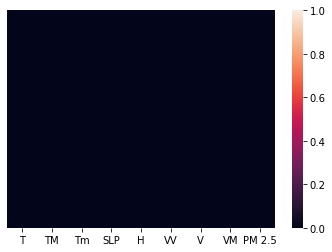

In [52]:

## Check for null values

sns.heatmap(dataset.isnull(),yticklabels=False)

In [53]:
dataset=dataset.dropna()


In [54]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]


In [55]:
X.isnull()


,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False,False


In [56]:
y.isnull()


0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Name: PM 2.5, Length: 549, dtype: bool

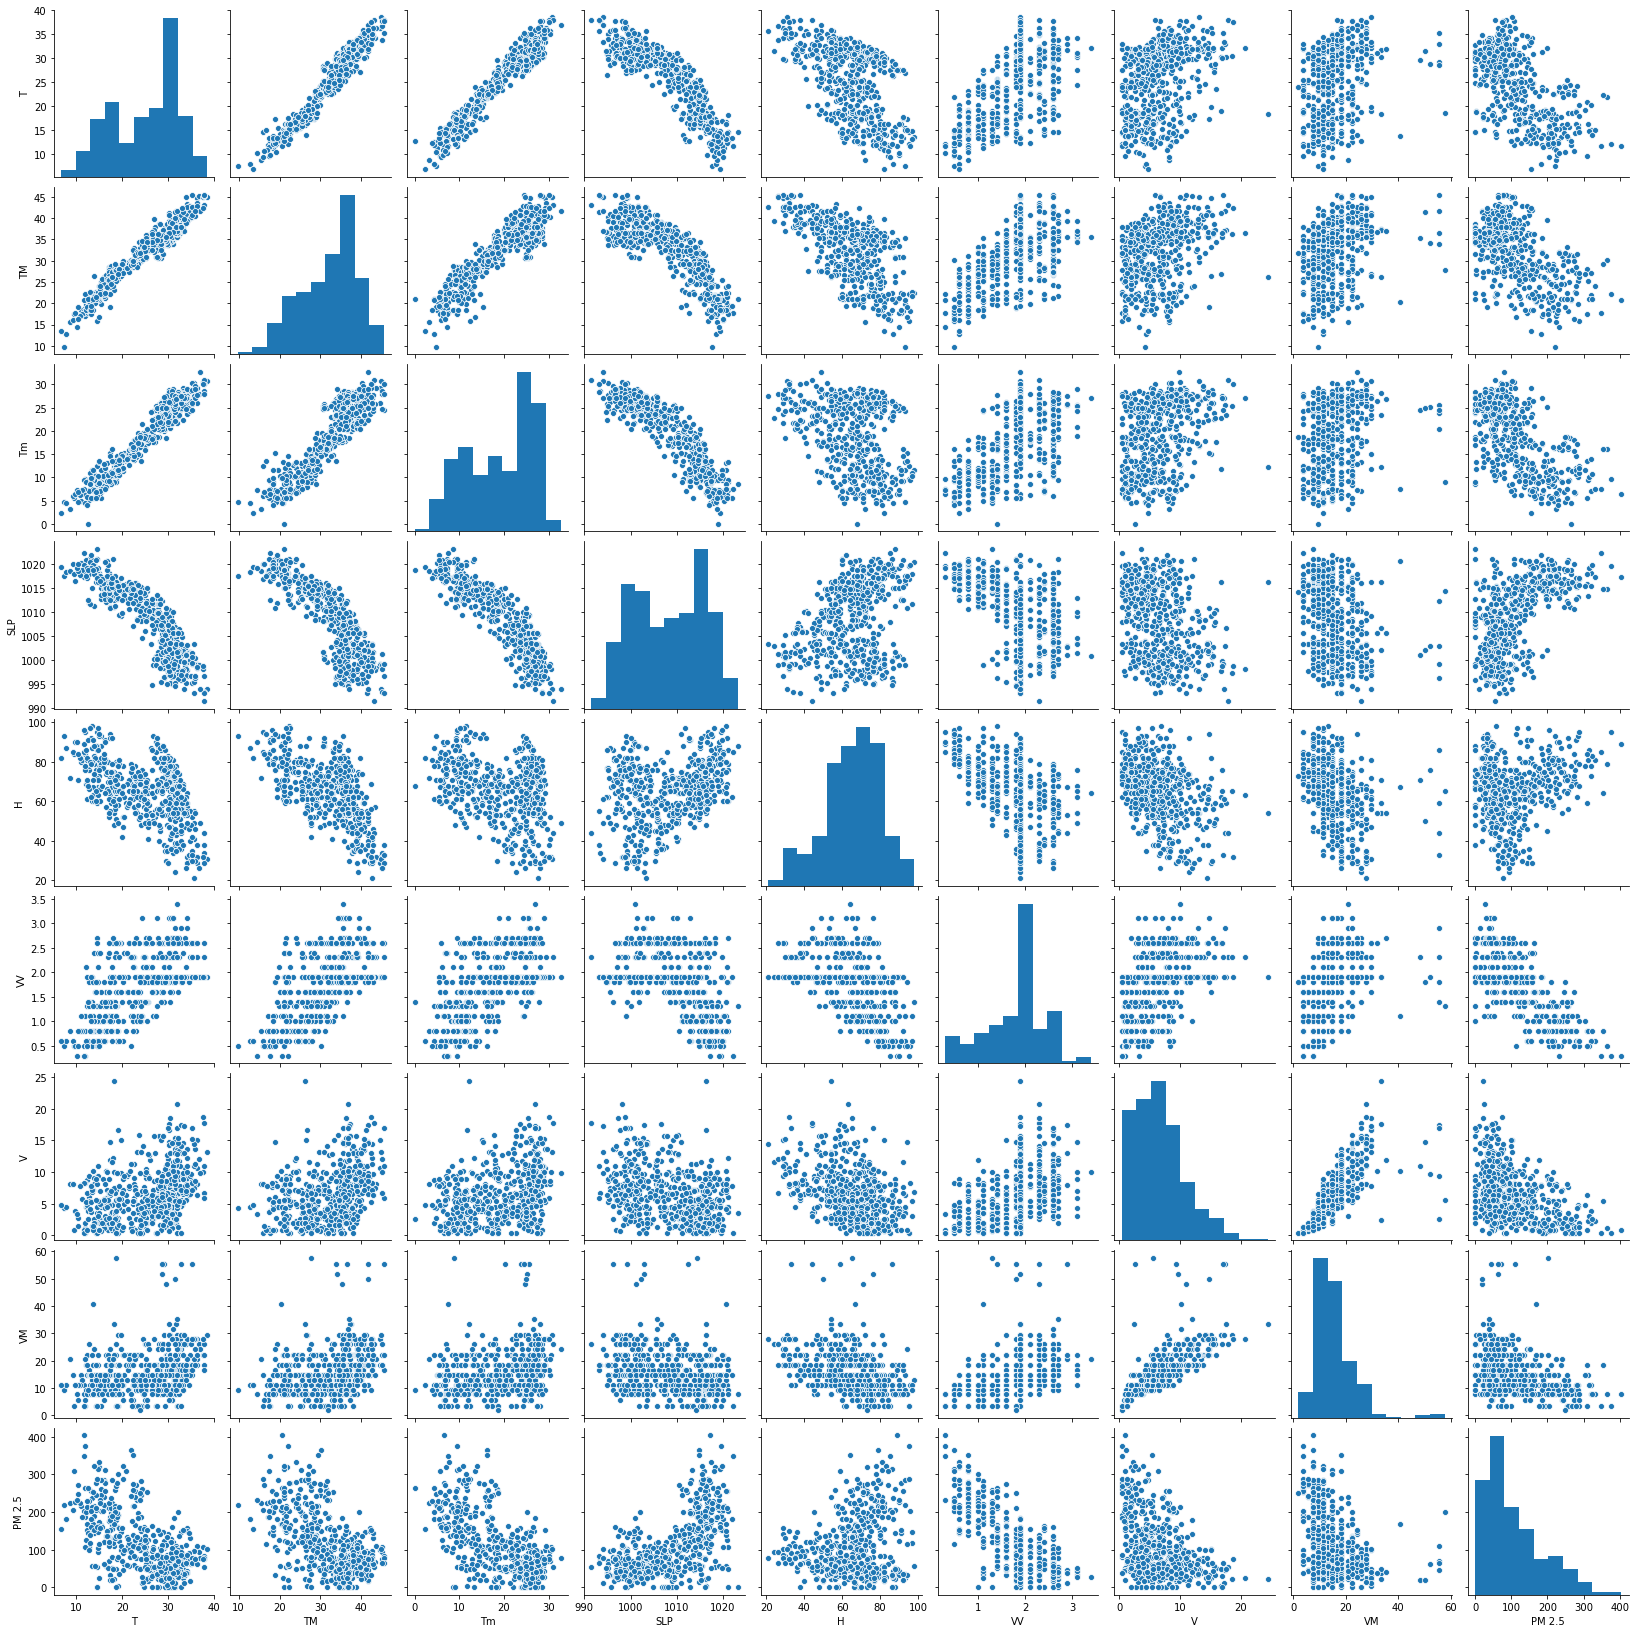

In [57]:
sns.pairplot(dataset)

In [58]:
dataset.corr()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967862,0.965157,-0.889020,-0.524467,0.608045,0.346485,0.286482,-0.629898
TM,0.967862,1.000000,0.901475,-0.835683,-0.612395,0.605626,0.342980,0.301275,-0.573447
Tm,0.965157,0.901475,1.000000,-0.901673,-0.342549,0.555229,0.327737,0.252748,-0.665778
SLP,-0.889020,-0.835683,-0.901673,1.000000,0.308668,-0.476347,-0.361016,-0.290194,0.608924
H,-0.524467,-0.612395,-0.342549,0.308668,1.000000,-0.480948,-0.416193,-0.380964,0.217851
VV,0.608045,0.605626,0.555229,-0.476347,-0.480948,1.000000,0.443132,0.367184,-0.729767
V,0.346485,0.342980,0.327737,-0.361016,-0.416193,0.443132,1.000000,0.748162,-0.441617
VM,0.286482,0.301275,0.252748,-0.290194,-0.380964,0.367184,0.748162,1.000000,-0.350197
PM 2.5,-0.629898,-0.573447,-0.665778,0.608924,0.217851,-0.729767,-0.441617,-0.350197,1.000000


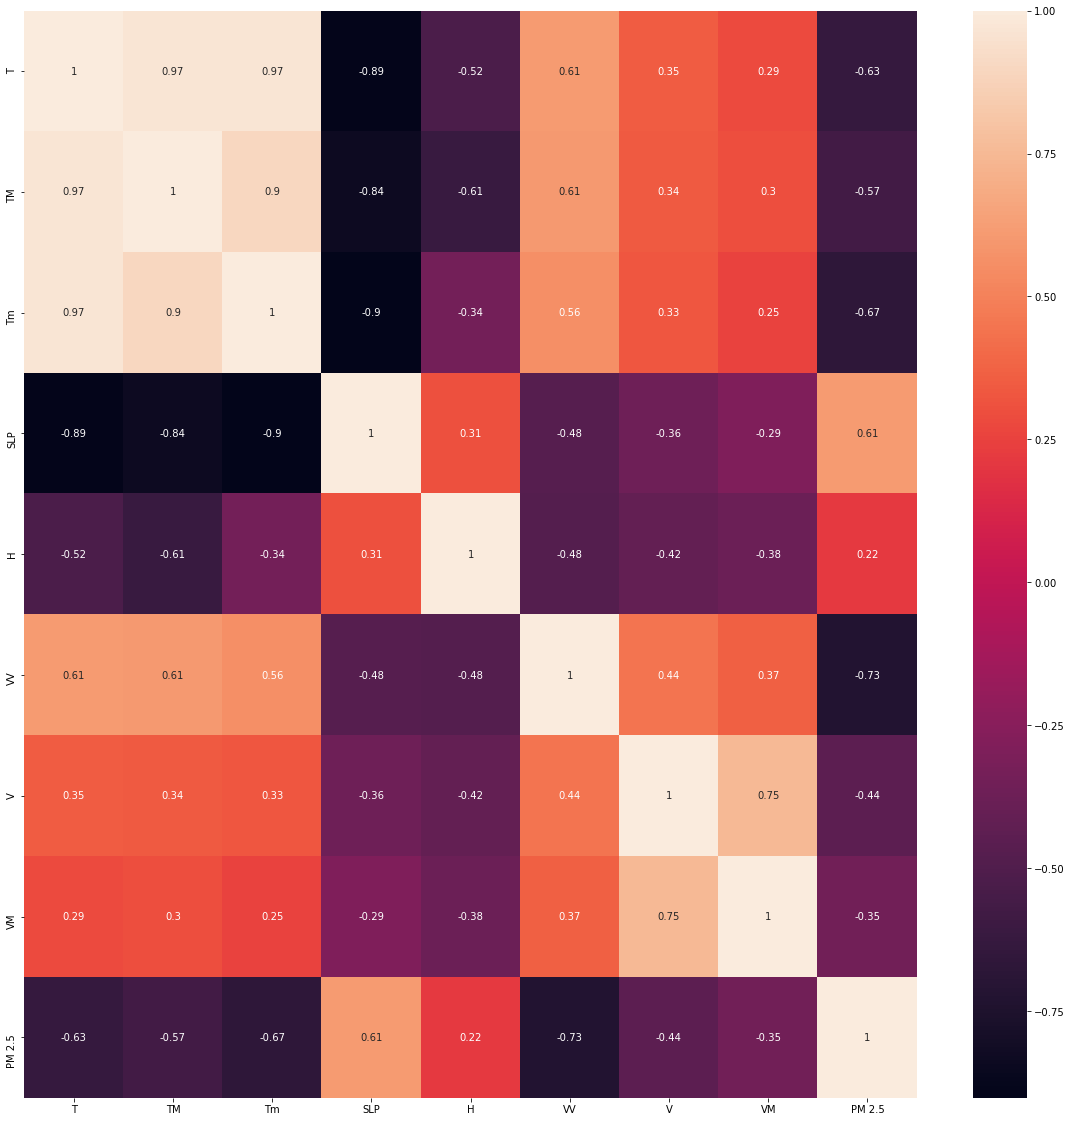

In [59]:
import seaborn as sns
#get correlations of each features in dataset
correlations = dataset.corr()
top_features = correlations.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_features].corr(),annot=True)

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [61]:
print(model.feature_importances_)

[0.10813029 0.06499943 0.15038832 0.13462179 0.06516851 0.3896354
 0.0487158  0.03834046]


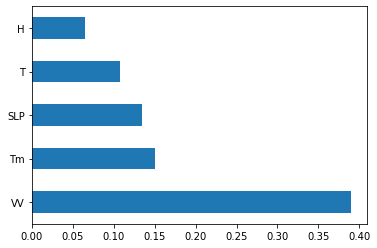

In [62]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

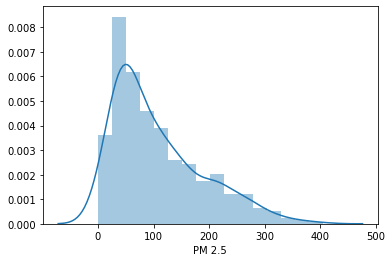

In [63]:
sns.distplot(y)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Decision tree regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt=DecisionTreeRegressor(criterion='mse')

In [66]:
regressor_dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [67]:
print('Decision tree R-squared for training set', regressor_dt.score(X_train,y_train))

Decision tree R-squared for training set 1.0


In [68]:
print('Decision tree R-squared for test set',regressor_dt.score(X_test,y_test))

Decision tree R-squared for test set 0.52110634696263


In [69]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor_dt,X,y,cv=5)

In [70]:
score.mean()

0.11022109186336833

In [71]:
prediction_dt=regressor_dt.predict(X_test)

In [72]:
prediction_dt

array([  0.        ,  55.41666667,  26.58333333, 211.45833333,
        25.79166667,  75.16666667,  51.79166667,  30.66666667,
        30.33333333, 236.41666667,  25.79166667, 278.33333333,
        76.875     , 404.5       , 109.33333333, 153.08333333,
       113.33333333,  46.91666667,  19.41666667,   0.        ,
        43.04166667,  53.25      ,  60.125     ,  50.41666667,
         0.        , 207.83333333,  50.33333333,  30.33333333,
        29.        ,  25.79166667, 249.5       ,  92.08333333,
       134.45833333, 217.375     ,  49.29166667, 153.625     ,
        64.83333333, 217.375     , 246.04166667,  37.58333333,
       157.5       ,  19.41666667, 160.        ,  34.375     ,
       264.91666667, 245.66666667,  79.29166667,  52.04166667,
        65.16666667, 196.54166667,  76.875     , 253.29166667,
        76.875     ,  62.25      , 130.33333333, 117.58333333,
        63.66666667, 166.91666667,  31.875     ,  33.16666667,
       157.5       , 219.72083333,  30.70833333,  56.29

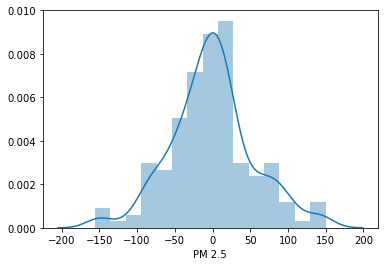

In [73]:
sns.distplot(y_test-prediction_dt)

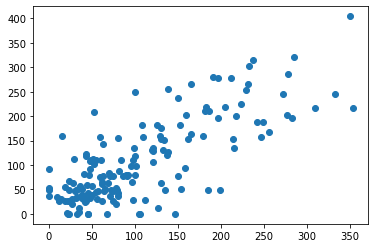

In [74]:
plt.scatter(y_test,prediction_dt)

<h3>Hyper parameter tuning</h3>

In [75]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [76]:
params={
    "splitter":["best","random"],
    "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_samples_leaf" : [ 1,2,3,4,5 ],
    "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
    "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    

}

In [77]:
from sklearn.model_selection import GridSearchCV
random_search=GridSearchCV(regressor_dt,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [78]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
         tmin, tsec = divmod(temp_sec, 60)
         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
    

In [79]:

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1168 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 3728 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 7312 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 11920 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 17552 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 24208 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 31888 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 40592 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 50320 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 61072 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 72848 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 85648 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 99472 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 10240


 Time taken: 0 hours 6 minutes and 9.67 seconds.


In [80]:
random_search.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [81]:
random_search.best_score_

-2531.0796240267127

In [82]:
pediction_hdt=random_search.predict(X_test)

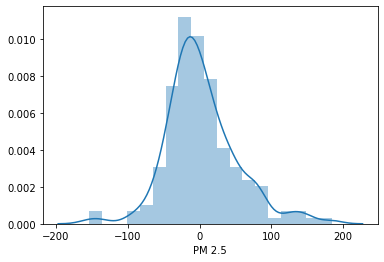

In [83]:
sns.distplot(y_test-pediction_hdt)

In [84]:

from sklearn import metrics

In [85]:
print('Mean Average Error:')
print(metrics.mean_absolute_error(y_test, prediction_dt))
print('Mean squared error:') 
print(metrics.mean_squared_error(y_test, prediction_dt))
print('Root Mean Squared Error:')
print(np.sqrt(metrics.mean_squared_error(y_test, prediction_dt)))

Mean Average Error:
41.00815656565657
Mean squared error:
3033.8760842803026
Root Mean Squared Error:
55.08063256971821


In [87]:
print('Mean Average Error:')
print(metrics.mean_absolute_error(y_test, pediction_hdt))
print('Mean squared error:') 
print(metrics.mean_squared_error(y_test, pediction_hdt))
print('Root Mean Squared Error:')
print(np.sqrt(metrics.mean_squared_error(y_test, pediction_hdt)))

Mean Average Error:
36.57784340573614
Mean squared error:
2490.441035132372
Root Mean Squared Error:
49.90431880240799


In [88]:
import pickle

In [89]:

# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)